In [ ]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 평면 상의 점 생성
np.random.seed(0)
X = np.random.uniform(-3., 3., (50, 2))
Y = np.sin(X[:, 0:1]) * np.sin(X[:, 1:2]) + np.random.randn(50, 1) * 0.05  # 실제 3차원 함수

# GP 모델 정의
k = gpflow.kernels.RBF(2)  # RBF 커널 (Radial Basis Function)
m = gpflow.models.GPR(data=(X, Y), kernel=k, mean_function=None)

# 모델 학습
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))

# 테스트 포인트 생성
xx, yy = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
X_test = np.vstack((xx.flatten(), yy.flatten())).T

# 예측
mean, var = m.predict_f(X_test)

# 시각화
fig = plt.figure(figsize=(12, 6))

# 예측 평균
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], Y, color='r', marker='o', label='Observations')
ax1.plot_surface(xx, yy, mean.numpy().reshape(xx.shape), alpha=0.5)
ax1.set_title('Mean')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# 예측 분산
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], Y, color='r', marker='o', label='Observations')
ax2.plot_surface(xx, yy, var.numpy().reshape(xx.shape), alpha=0.5)
ax2.set_title('Variance')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')

plt.show()


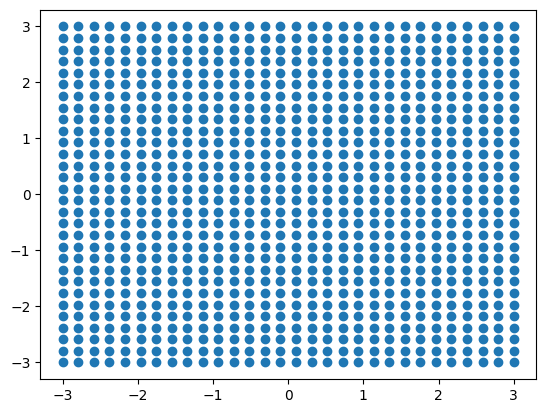

In [7]:
plt.scatter(xx,yy)
plt.show()

In [13]:
mean.numpy().reshape(xx.shape).shape

(30, 30)

In [ ]:
Y.shape

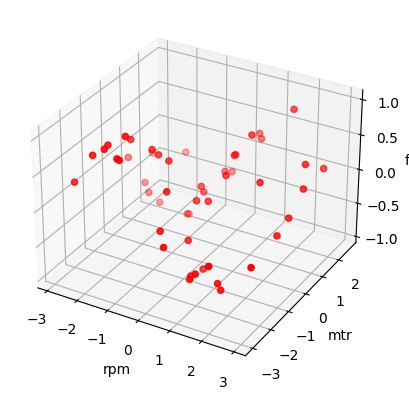

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='r', marker='o')
ax.set_xlabel('rpm')
ax.set_ylabel('mtr')
ax.set_zlabel('fric')
plt.show()

In [ ]:
X.shape

(50, 2)

In [ ]:
X[:,0]

array([ 0.29288102,  0.61658026, -0.4580712 , -0.37447673,  2.78197656,
        1.75035023,  0.40826737, -2.57378365, -2.87868962,  1.66894051,
        2.87171005, -0.23112383, -2.29035344, -2.13988028,  0.13108993,
       -1.41266633, -0.26309801, -2.8872612 ,  0.67257434,  2.66248847,
       -0.8429526 ,  1.18578718,  1.00060029, -1.73770463, -1.10742989,
        0.42118062,  2.93024303, -1.74673946,  0.91864995, -0.20213536,
       -2.0461825 ,  0.93797754, -1.82050583,  1.92595938,  2.02766944,
        2.85875679,  2.86056653,  1.43558148, -1.30315822, -1.22315881,
       -1.09210092, -2.61511502,  0.39960873,  0.13948832,  0.45567897,
       -1.08858629, -2.20921283, -1.26356344,  0.51907761,  1.97364018])

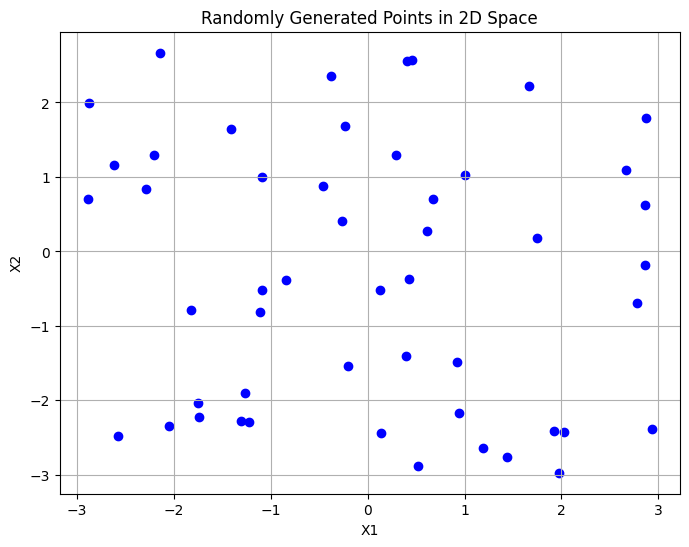

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3차원 공간에서 무작위로 점 생성
np.random.seed(0)
X = np.random.uniform(-3., 3., (50, 2))

# 산점도 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Randomly Generated Points in 2D Space')
plt.grid(True)
plt.show()
